# Plot wake profiles

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

import postproamrwindsample_xarray as ppsample
import postproengine as ppeng
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Load ruamel or pyyaml as needed
try:
    import ruamel.yaml as yaml
    print("# Loaded ruamel.yaml")
    useruamel=True
    loaderkwargs = {}
    dumperkwargs = {'Dumper':yaml.RoundTripDumper, 'indent':4, 'default_flow_style':False} 
    yaml = yaml.YAML(typ='rt')
except:
    import yaml as yaml
    print("# Loaded yaml")
    useruamel=False
    loaderkwargs = {}
    dumperkwargs = {'default_flow_style':False }
    
if useruamel: Loader=yaml.load
else:         Loader=yaml.safe_load

from functools import partial

# Loaded ruamel.yaml


In [3]:
def stringReplaceDict(s, dreplace):
    outstr = str(s)
    for k, g in dreplace.items():
        outstr=outstr.replace(k, str(g))
    return outstr

In [4]:
replacedict={'RESULTSHHDIR':'../results/HHProfiles_300_900',
             'RESULTSXZDIR':'../results/XZProfiles_300_900',
             'UINF':11.4
            }

In [5]:
yamlstring="""
globalattributes:
  verbose: False
  udfmodules: []
  executeorder:
  - plotstuff

plotstuff:
  plotcsv:
  - name: plotXY
    xlabel: '$U/U_\infty$'
    ylabel: 'y/D'
    xscale: linear
    yscale: linear
    title: 'XY Wake Profiles'
    figsize: [6,6]
    legendopts: {'loc':'upper left'}
    savefile: ../results/images/WakeProfile_XY_300_900.png
    #figname: figXZ
    #axesnum: 0
    #postplotfunc: spectrapoints.formatplot
    csvfiles:
    - {'file':'RESULTSHHDIR/XY_wake_02.csv', 'xcol':'', 'ycol':'a2', 'lineopts':{'color':'k', 'lw':1, 'linestyle':'-', 'label':'X/D=2'},
       'xscalefunc':"lambda x:np.sqrt(np.array(x['velocityx_avg']**2 + x['velocityy_avg']**2))/UINF",'yscalefunc':'lambda y:(y-126*2)/126'}

    - {'file':'RESULTSHHDIR/XY_wake_04.csv', 'xcol':'', 'ycol':'a2', 'lineopts':{'color':'r', 'lw':1, 'linestyle':'-', 'label':'X/D=4'},
       'xscalefunc':"lambda x:np.sqrt(np.array(x['velocityx_avg']**2 + x['velocityy_avg']**2))/UINF",'yscalefunc':'lambda y:(y-126*2)/126'}

    - {'file':'RESULTSHHDIR/XY_wake_06.csv', 'xcol':'', 'ycol':'a2', 'lineopts':{'color':'c', 'lw':1, 'linestyle':'-', 'label':'X/D=6'},
       'xscalefunc':"lambda x:np.sqrt(np.array(x['velocityx_avg']**2 + x['velocityy_avg']**2))/UINF",'yscalefunc':'lambda y:(y-126*2)/126'}
       
    - {'file':'RESULTSHHDIR/XY_wake_08.csv', 'xcol':'', 'ycol':'a2', 'lineopts':{'color':'g', 'lw':1, 'linestyle':'-', 'label':'X/D=8'},
       'xscalefunc':"lambda x:np.sqrt(np.array(x['velocityx_avg']**2 + x['velocityy_avg']**2))/UINF",'yscalefunc':'lambda y:(y-126*2)/126'}

  - name: plotXZ
    xlabel: '$U/U_\infty$'
    ylabel: 'z [m]'
    xscale: linear
    yscale: linear
    title: 'XZ Wake Profiles'
    figsize: [6,6]
    legendopts: {'loc':'upper left'}
    savefile: ../results/images/WakeProfile_XZ_300_900.png
    #figname: figXZ
    #axesnum: 0
    #postplotfunc: spectrapoints.formatplot
    csvfiles:
    - {'file':'RESULTSXZDIR/XZ_wake_02.csv', 'xcol':'', 'ycol':'a2', 'lineopts':{'color':'k', 'lw':1, 'linestyle':'-', 'label':'X/D=2'},
       'xscalefunc':"lambda x:np.sqrt(np.array(x['velocityx_avg']**2 + x['velocityy_avg']**2))/UINF",'yscalefunc':'lambda y:y'}

    - {'file':'RESULTSXZDIR/XZ_wake_04.csv', 'xcol':'', 'ycol':'a2', 'lineopts':{'color':'r', 'lw':1, 'linestyle':'-', 'label':'X/D=4'},
       'xscalefunc':"lambda x:np.sqrt(np.array(x['velocityx_avg']**2 + x['velocityy_avg']**2))/UINF",'yscalefunc':'lambda y:y'}

    - {'file':'RESULTSXZDIR/XZ_wake_06.csv', 'xcol':'', 'ycol':'a2', 'lineopts':{'color':'c', 'lw':1, 'linestyle':'-', 'label':'X/D=6'},
       'xscalefunc':"lambda x:np.sqrt(np.array(x['velocityx_avg']**2 + x['velocityy_avg']**2))/UINF",'yscalefunc':'lambda y:y'}

    - {'file':'RESULTSXZDIR/XZ_wake_08.csv', 'xcol':'', 'ycol':'a2', 'lineopts':{'color':'g', 'lw':1, 'linestyle':'-', 'label':'X/D=8'},
       'xscalefunc':"lambda x:np.sqrt(np.array(x['velocityx_avg']**2 + x['velocityy_avg']**2))/UINF",'yscalefunc':'lambda y:y'}

"""
f = io.StringIO(stringReplaceDict(yamlstring, replacedict))
yamldict = Loader(f, **loaderkwargs)

Initialized plotcsv
Running plotcsv
Saving ../results/images/WakeProfile_XY_300_900.png
Saving ../results/images/WakeProfile_XZ_300_900.png


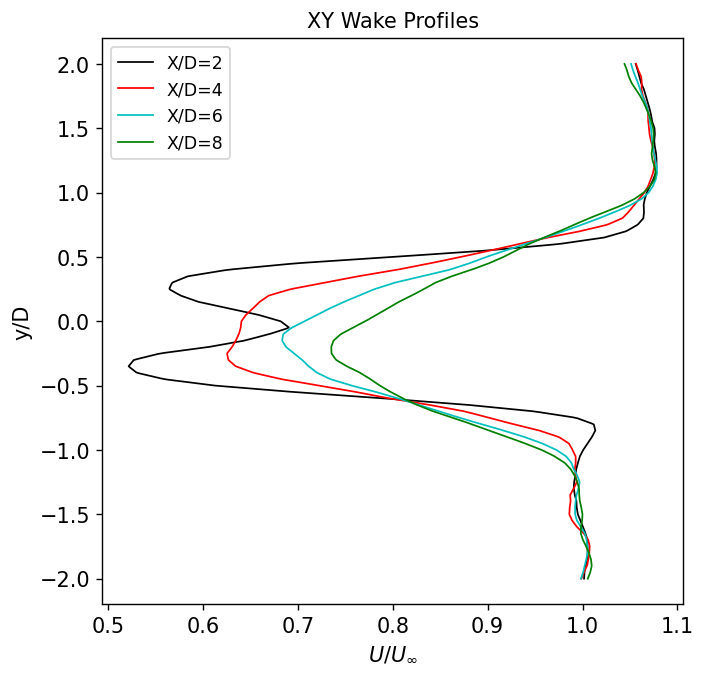

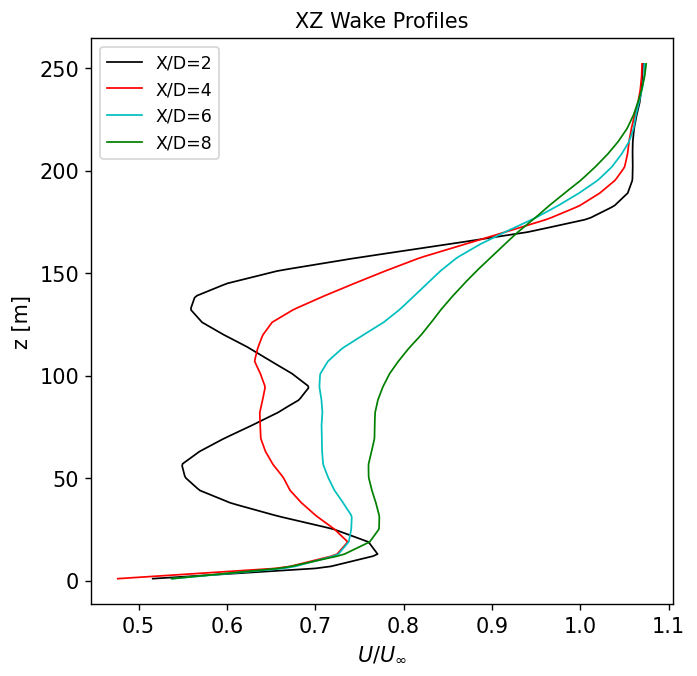

In [6]:
# Run the driver
ppeng.driver(yamldict, verbose=True)

In [7]:
# Write out the notebook to a python script
!jupyter nbconvert --to script PlotWakeProfiles.ipynb
with open('PlotWakeProfiles.py', 'r') as f:
    lines = f.readlines()
with open('PlotWakeProfiles.py', 'w') as f:
    for line in lines:
        if "'matplotlib', 'inline'" in line: line = 'plt.show(block=False)'
        if 'nbconvert --to script' in line:
            break
        else:
            f.write(line)

[NbConvertApp] Converting notebook PlotWakeProfiles.ipynb to script
[NbConvertApp] Writing 5016 bytes to PlotWakeProfiles.py
